
# **CIFAR-10 Image Classification**


-------------------
## **Context**
-------------------

**CIFAR-10** (Canadian Institute For Advanced Research) is a **collection of images with 10 different classes** representing airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. **CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects.**


---------------------
## **Objective**
---------------------

I build a multi-class classification algorithm to predict 10 different classes of the CIFAR-10 dataset using **Convolutional Neural Networks and Transfer Learning**.

-------------------
## **Dataset**
-------------------

The CIFAR-10 dataset consists of 60000 32x32x3, i.e., color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

## **Loading libraries**

In [ ]:
import keras

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.optimizers import Adam

## **Importing and loading the CIFAR dataset**

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

the 3-dimensional NumPy representation of the first image in the training data.

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[0]

array([6], dtype=uint8)

The target labels are encoded in numerical format. 

In [ ]:
x_test.shape

(10000, 32, 32, 3)

- There are **10,000 images in the test data**.

## **Converting NumPy arrays to images and visualizing some random images**

In [ ]:
num_classes = 10

cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

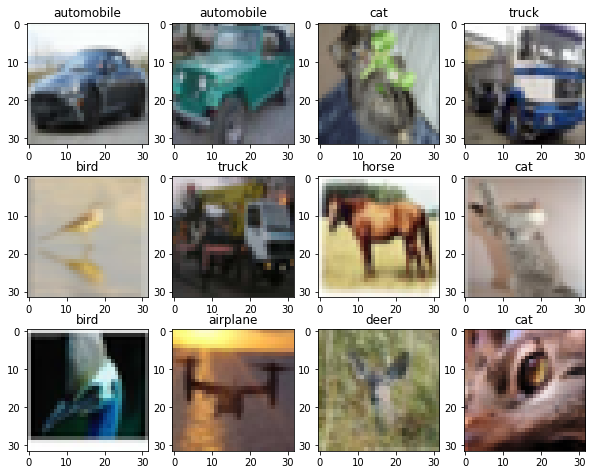

In [ ]:
rows = 3

cols = 4

fig = plt.figure(figsize = (10, 8))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(y_train))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(x_train[random_index, :])

        ax.set_title(cifar10_classes[y_train[random_index, 0]])

plt.show()

## **Data Preparation**

In [ ]:
# standardize all the images to have values between 0 - 1
x_train_normalized = x_train/255

x_test_normalized = x_test/255

Since this is a **10 class classification problem**, the output layer should have **10 neurons.**

In [ ]:
# Creating one-hot encoded representation 
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

## **Model Building CNN**

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model_1 = Sequential()

# first convolutional layer: 16 filters, kernel size = 3x3,  'same' padding
model_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

# LeakyRelu activation, a negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# second convolutional layer: 32 filters, kernel size = 3x3
model_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

#LeakyRelu activation, negative slope of 0.1
model_1.add(LeakyReLU(0.1))
    
# max pooling to reduce the size of the output of second convolutional layer
model_1.add(MaxPooling2D(pool_size = (2, 2)))
    
# Flattening the 3-d output 
model_1.add(Flatten())

# fully connected dense layer: 256 neurons    
model_1.add(Dense(256))

# LeakyRelu activation, a negative slope=0.1
model_1.add(LeakyReLU(0.1))

# the output layer: 10 neurons, 'softmax' activation
model_1.add(Dense(10, activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
# compile the model
model_1.compile(
    
    loss = 'categorical_crossentropy',
    
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),
    
    metrics=['accuracy']
)

In [ ]:
history_1 = model_1.fit(
    
            x_train_normalized, y_train_encoded,
            
            epochs = 10,
            
            validation_split = 0.1,
            
            shuffle = True,
            
            verbose = 2
)

Epoch 1/10
1407/1407 - 19s - loss: 1.3551 - accuracy: 0.5157 - val_loss: 1.0576 - val_accuracy: 0.6206 - 19s/epoch - 13ms/step
Epoch 2/10
1407/1407 - 9s - loss: 0.9225 - accuracy: 0.6753 - val_loss: 0.9056 - val_accuracy: 0.6880 - 9s/epoch - 6ms/step
Epoch 3/10
1407/1407 - 9s - loss: 0.6909 - accuracy: 0.7562 - val_loss: 0.9105 - val_accuracy: 0.6990 - 9s/epoch - 6ms/step
Epoch 4/10
1407/1407 - 9s - loss: 0.4753 - accuracy: 0.8357 - val_loss: 0.9843 - val_accuracy: 0.6982 - 9s/epoch - 6ms/step
Epoch 5/10
1407/1407 - 9s - loss: 0.2814 - accuracy: 0.9044 - val_loss: 1.0863 - val_accuracy: 0.7106 - 9s/epoch - 6ms/step
Epoch 6/10
1407/1407 - 9s - loss: 0.1533 - accuracy: 0.9496 - val_loss: 1.4088 - val_accuracy: 0.6936 - 9s/epoch - 7ms/step
Epoch 7/10
1407/1407 - 9s - loss: 0.0839 - accuracy: 0.9727 - val_loss: 1.6588 - val_accuracy: 0.6998 - 9s/epoch - 6ms/step
Epoch 8/10
1407/1407 - 9s - loss: 0.0525 - accuracy: 0.9836 - val_loss: 1.9140 - val_accuracy: 0.6970 - 9s/epoch - 7ms/step
Epoch

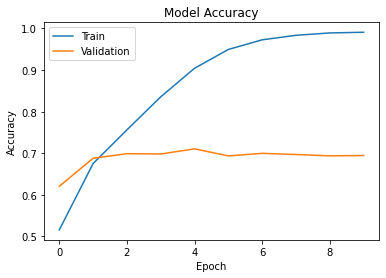

In [ ]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:** 

- from the above plot, I see the model has done poorly on the validation data. The model is highly overfitting the training data. 


I will add a few dropout layers to the model structure to reduce overfitting and see if this improves the model or not.

In [ ]:
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

model_2.add(LeakyReLU(0.1))

model_2.add(Dropout(0.2))

model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

model_2.add(LeakyReLU(0.1))

model_2.add(Dropout(0.2))
    
model_2.add(MaxPooling2D(pool_size = (2, 2)))
    
model_2.add(Flatten())

model_2.add(Dense(256))

model_2.add(LeakyReLU(0.1))

model_2.add(Dropout(0.5))

model_2.add(Dense(10, activation = 'softmax'))

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0

In [ ]:
# compile
model_2.compile(
 
    loss = 'categorical_crossentropy',
    
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),
)

In [ ]:
# Fit
history_2 = model_2.fit(
    
            x_train_normalized, y_train_encoded,

            epochs = 10,
            
            validation_split = 0.1,

            shuffle = True,
            
            verbose = 2
)

Epoch 1/10
1407/1407 - 11s - loss: 1.5545 - accuracy: 0.4451 - val_loss: 1.7006 - val_accuracy: 0.4308 - 11s/epoch - 8ms/step
Epoch 2/10
1407/1407 - 10s - loss: 1.1775 - accuracy: 0.5825 - val_loss: 1.2222 - val_accuracy: 0.5828 - 10s/epoch - 7ms/step
Epoch 3/10
1407/1407 - 10s - loss: 1.0168 - accuracy: 0.6428 - val_loss: 1.1596 - val_accuracy: 0.6174 - 10s/epoch - 7ms/step
Epoch 4/10
1407/1407 - 10s - loss: 0.9153 - accuracy: 0.6762 - val_loss: 1.1593 - val_accuracy: 0.6192 - 10s/epoch - 7ms/step
Epoch 5/10
1407/1407 - 10s - loss: 0.8393 - accuracy: 0.7048 - val_loss: 1.1708 - val_accuracy: 0.6276 - 10s/epoch - 7ms/step
Epoch 6/10
1407/1407 - 10s - loss: 0.7721 - accuracy: 0.7272 - val_loss: 1.2177 - val_accuracy: 0.6312 - 10s/epoch - 7ms/step
Epoch 7/10
1407/1407 - 10s - loss: 0.7122 - accuracy: 0.7492 - val_loss: 1.0574 - val_accuracy: 0.6698 - 10s/epoch - 7ms/step
Epoch 8/10
1407/1407 - 10s - loss: 0.6680 - accuracy: 0.7627 - val_loss: 0.9645 - val_accuracy: 0.6820 - 10s/epoch - 7

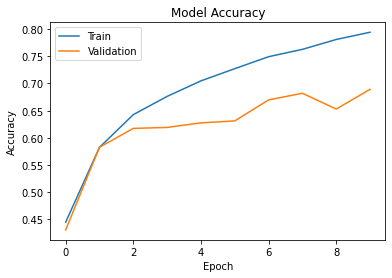

In [ ]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:** 

- The second model with dropout layers seems to have reduced the overfitting in comparison to the previous model, but still, the model is not performing well on the validation data. 


I will try to build another model with a few more convolution layers, max-pooling layers, and dropout layers to reduce overfitting. And I will change the learning rate and the number of epochs and see if the model's performance improves.

In [ ]:
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
model_3 = Sequential()

model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 3)))

model_3.add(LeakyReLU(0.1))

model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

model_3.add(LeakyReLU(0.1))

model_3.add(MaxPooling2D(pool_size = (2, 2)))

model_3.add(Dropout(0.25))
    
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

model_3.add(LeakyReLU(0.1))

model_3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

model_3.add(LeakyReLU(0.1))
 
model_3.add(MaxPooling2D(pool_size = (2, 2)))

model_3.add(Dropout(0.25))

model_3.add(Flatten())
  
model_3.add(Dense(256))

model_3.add(LeakyReLU(0.1))
    
model_3.add(Dropout(0.5))

model_3.add(Dense(10, activation = 'softmax'))

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In this new architecture, although **the number of convolutional layers has increased**, but the **total number of trainable parameters has reduced significantly (~ 50%)**. This is due to the addition of a few **max-pooling layers in between**. Let's train this model.

In [ ]:
model_3.compile(
    
    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),
    
    metrics = ['accuracy']
)

In [ ]:
history_3 = model_3.fit(
    
            x_train_normalized, y_train_encoded,

            epochs = 15,

            validation_split = 0.1,

            shuffle = True,

            verbose = 2
)

Epoch 1/15
1407/1407 - 14s - loss: 1.6298 - accuracy: 0.4076 - val_loss: 1.3043 - val_accuracy: 0.5286 - 14s/epoch - 10ms/step
Epoch 2/15
1407/1407 - 12s - loss: 1.2694 - accuracy: 0.5462 - val_loss: 1.0677 - val_accuracy: 0.6286 - 12s/epoch - 9ms/step
Epoch 3/15
1407/1407 - 12s - loss: 1.1054 - accuracy: 0.6079 - val_loss: 0.9629 - val_accuracy: 0.6626 - 12s/epoch - 9ms/step
Epoch 4/15
1407/1407 - 12s - loss: 1.0017 - accuracy: 0.6465 - val_loss: 0.9013 - val_accuracy: 0.6908 - 12s/epoch - 9ms/step
Epoch 5/15
1407/1407 - 13s - loss: 0.9240 - accuracy: 0.6752 - val_loss: 0.8416 - val_accuracy: 0.7102 - 13s/epoch - 9ms/step
Epoch 6/15
1407/1407 - 13s - loss: 0.8632 - accuracy: 0.6963 - val_loss: 0.7724 - val_accuracy: 0.7350 - 13s/epoch - 9ms/step
Epoch 7/15
1407/1407 - 13s - loss: 0.8120 - accuracy: 0.7168 - val_loss: 0.7838 - val_accuracy: 0.7258 - 13s/epoch - 9ms/step
Epoch 8/15
1407/1407 - 13s - loss: 0.7721 - accuracy: 0.7303 - val_loss: 0.7191 - val_accuracy: 0.7508 - 13s/epoch - 

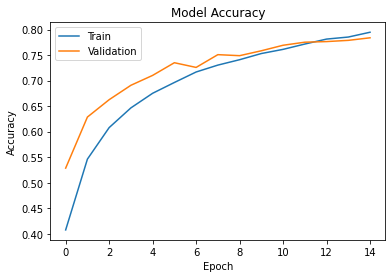

In [ ]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:** 

- The third iteration of this model seems very promising now.
- **The validation accuracy has improved substantially** and the problem of **overfitting has been solved**. 
- The above plot shows that **the validation accuracy is higher than the training accuracy**. 
 

### **Transfer Learning**

In [ ]:
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg_model = VGG16(weights = 'imagenet', 
                  
                       include_top = False, 
                  
                       input_shape = (32, 32, 3), pooling = 'max')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

- The VGG16 model has **more than 14.7 M trainable parameters.** 
- I will use the pre-trained weights and biases.
- **I will take the output of the 3rd block of the VGG16 model as the input of the new model.**

In [ ]:
transfer_layer = vgg_model.get_layer('block3_pool')

In [ ]:
vgg_model.trainable = False

In [ ]:
x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(64, activation = 'relu')(x)

x = BatchNormalization()(x)

pred = Dense(10, activation = 'softmax')(x)

# Initializing the model
model_4 = Model(vgg_model.input, pred)

In [ ]:
model_4.compile(loss = 'categorical_crossentropy',
                
              optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0005),

              metrics = ['accuracy'])

In [ ]:
history_4 = model_4.fit(
    
            x_train_normalized, y_train_encoded,

            epochs = 10,

            batch_size = 250,

            validation_split = 0.1,

            verbose = 2
)

Epoch 1/10
180/180 - 10s - loss: 1.0818 - accuracy: 0.6320 - val_loss: 0.8091 - val_accuracy: 0.7244 - 10s/epoch - 56ms/step
Epoch 2/10
180/180 - 8s - loss: 0.8667 - accuracy: 0.7068 - val_loss: 0.7526 - val_accuracy: 0.7462 - 8s/epoch - 45ms/step
Epoch 3/10
180/180 - 8s - loss: 0.7654 - accuracy: 0.7394 - val_loss: 0.6967 - val_accuracy: 0.7658 - 8s/epoch - 42ms/step
Epoch 4/10
180/180 - 8s - loss: 0.6931 - accuracy: 0.7654 - val_loss: 0.6643 - val_accuracy: 0.7744 - 8s/epoch - 45ms/step
Epoch 5/10
180/180 - 8s - loss: 0.6395 - accuracy: 0.7832 - val_loss: 0.6554 - val_accuracy: 0.7752 - 8s/epoch - 45ms/step
Epoch 6/10
180/180 - 8s - loss: 0.5934 - accuracy: 0.7973 - val_loss: 0.6257 - val_accuracy: 0.7840 - 8s/epoch - 45ms/step
Epoch 7/10
180/180 - 8s - loss: 0.5527 - accuracy: 0.8108 - val_loss: 0.6206 - val_accuracy: 0.7900 - 8s/epoch - 42ms/step
Epoch 8/10
180/180 - 8s - loss: 0.5064 - accuracy: 0.8268 - val_loss: 0.6014 - val_accuracy: 0.7960 - 8s/epoch - 46ms/step
Epoch 9/10
180

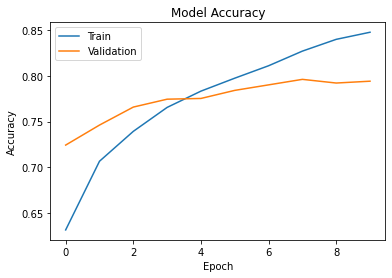

In [ ]:
plt.plot(history_4.history['accuracy'])

plt.plot(history_4.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.show()

**Observations:**

- The model **training accuracy is slightly higher than the validation accuracy**.
- The **validation accuracy has improved in comparison to the previous model**.
- have achieved the **best validation accuracy so far without actually training any of the convolutional layers.** 


## **Making predictions**

In [ ]:
y_pred_test = model_4.predict(x_test_normalized)

y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

y_pred_test_max_probas = np.max(y_pred_test, axis = 1)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.92      0.84      0.88      1000
           2       0.76      0.70      0.73      1000
           3       0.69      0.54      0.61      1000
           4       0.78      0.73      0.76      1000
           5       0.61      0.76      0.68      1000
           6       0.82      0.86      0.84      1000
           7       0.86      0.83      0.84      1000
           8       0.82      0.91      0.86      1000
           9       0.84      0.85      0.85      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



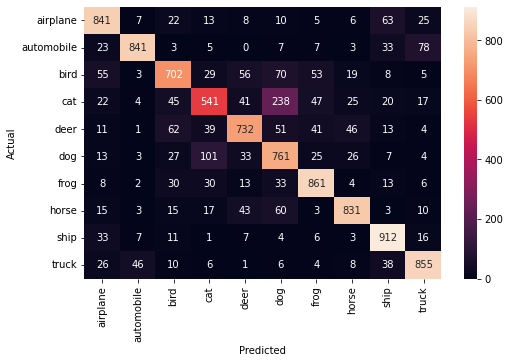

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred_test_classes))

cm = confusion_matrix(y_test, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = cifar10_classes, yticklabels = cifar10_classes)

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations:**

- The model is giving about **79% accuracy on the test data** 
- The **recall has a high range** which implies that the **model is good at identifying some objects while poor at identifying some other objects**.
- The model is majorly **confused between cats and dogs**. This implies that the **model might be focused on features related to shapes and sizes but not deep features of objects** that can help to distinguish between objects like cats and dogs.
-  **Precision also has a high range with the 'cat' class having the least precision.**
- The **highest precision is for 'automobile'** which implies that the model can distinguish automobiles from other objects. 

## **Visualizing the predicted images**

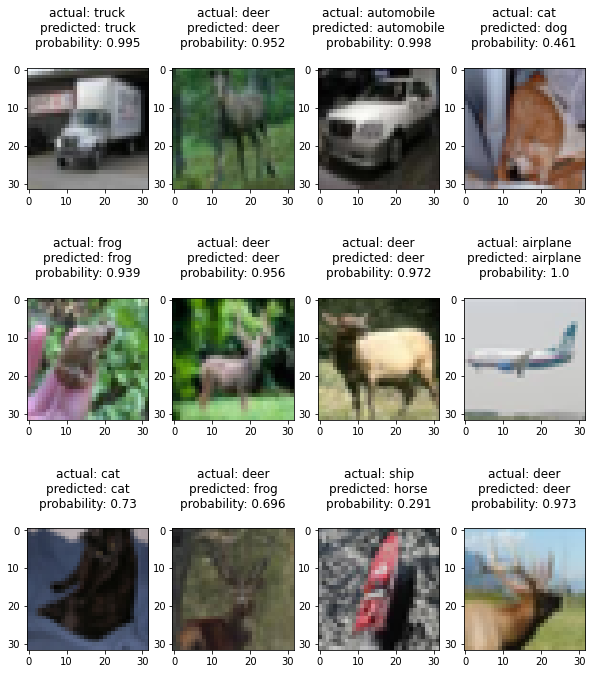

In [ ]:
rows = 3

cols = 4

fig = plt.figure(figsize = (10, 12))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(y_test))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(x_test[random_index, :])

        pred_label = cifar10_classes[y_pred_test_classes[random_index]]

        pred_proba = y_pred_test_max_probas[random_index]

        true_label = cifar10_classes[y_test[random_index, 0]]
        
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()